In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('billionaires.csv')

In [4]:
finalworth = df['finalWorth']

mean_finalworth = finalworth.mean()
median_finalworth = finalworth.median()
skewness_finalworth = finalworth.skew()
kurtosis_finalworth = finalworth.kurt()

print(mean_finalworth, median_finalworth, skewness_finalworth, kurtosis_finalworth)

4623.787878787879 2300.0 10.012367321086751 145.07368067526582


Histplot

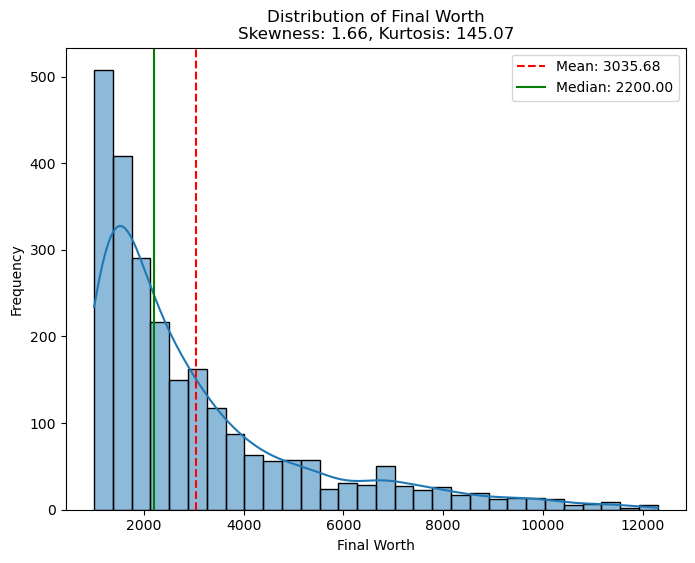

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(finalworth, kde=True, bins=30)
plt.axvline(mean_finalworth, color='r', linestyle='--', label=f'Mean: {mean_finalworth:.2f}')
plt.axvline(median_finalworth, color='g', linestyle='-', label=f'Median: {median_finalworth:.2f}')
plt.title(f'Distribution of Final Worth\nSkewness: {skewness_finalworth:.2f}, Kurtosis: {kurtosis_finalworth:.2f}')
plt.xlabel('Final Worth')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout
plt.show()

Boxplot

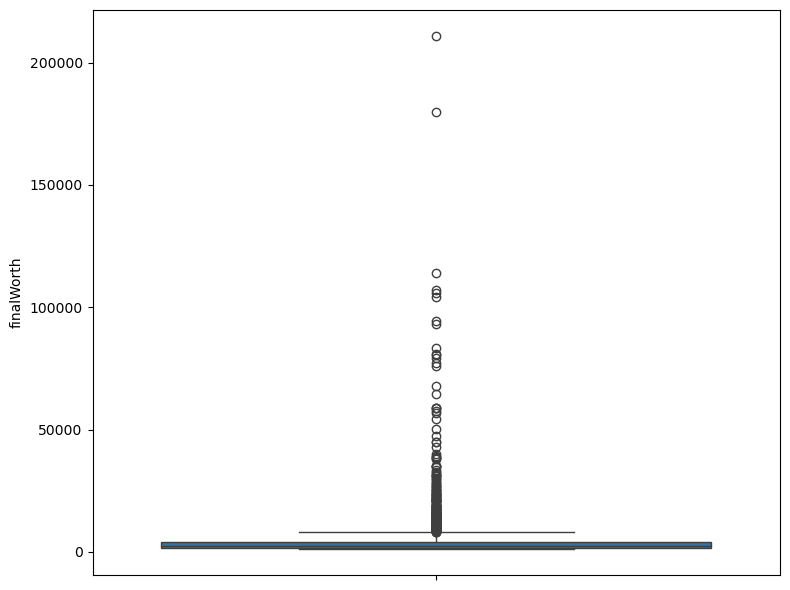

In [6]:
plt.figure(figsize=(8,6))
sns.boxplot(finalworth)
plt.tight_layout()
plt.show()

    Remove extreme outliers and retry

In [7]:
#Identify extreme outliers
Q1 = df['finalWorth'].quantile(0.25)
Q3 = df['finalWorth'].quantile(0.75)
IQR = Q3 - Q1

lower_fence = Q1 - (3 * IQR)
upper_fence = Q3 + (3 * IQR)

df['is_extreme_outlier'] = (df['finalWorth']>upper_fence) | (df['finalWorth']<lower_fence)

num_extreme_outliers = df['is_extreme_outlier'].sum()
print(f'Number of extreme outliers identified: {num_extreme_outliers}')

Number of extreme outliers identified: 140


1.6646313461296731


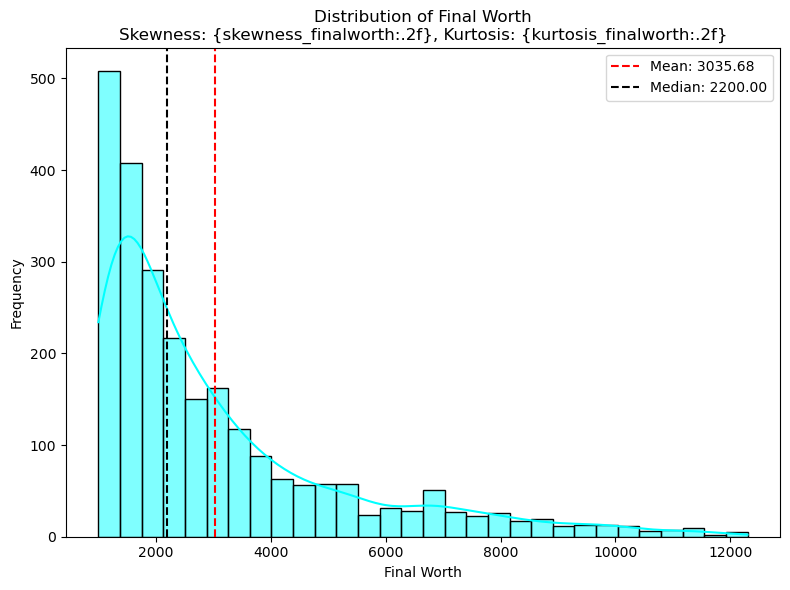

In [8]:
#Remove extreme outliers
df = df[df['is_extreme_outlier']==False].copy()

finalworth = df['finalWorth']

mean_finalworth = finalworth.mean()
median_finalworth = finalworth.median()
skewness_finalworth = finalworth.skew()
print(skewness_finalworth)

plt.figure(figsize=(8,6))
sns.histplot(finalworth, kde=True, color='Cyan', bins=30)
plt.axvline(mean_finalworth, color='r', linestyle='--', label=f'Mean: {mean_finalworth:.2f}')
plt.axvline(median_finalworth, color='black', linestyle='--', label=f'Median: {median_finalworth:.2f}')
plt.title('Distribution of Final Worth\nSkewness: {skewness_finalworth:.2f}, Kurtosis: {kurtosis_finalworth:.2f}')
plt.xlabel('Final Worth')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

#Compare CoV for two categories

In [10]:
group1_name = 'Fashion & Retail'
group2_name = 'Technology'

group1 = df[df['category']==group1_name]['finalWorth']
group2 = df[df['category']==group2_name]['finalWorth']

In [11]:
#Calculate CoV
cov_group1 = group1.std() / group1.mean() * 100
cov_group2 = group2.std() / group2.mean() * 100

print(f'Coefficient of Variation (Cov) for {group1_name}: {cov_group1:.2f}%')
print(f'Coefficient of Variation (Cov) for {group2_name}: {cov_group2:.2f}%')

Coefficient of Variation (Cov) for Fashion & Retail: 73.09%
Coefficient of Variation (Cov) for Technology: 77.09%
